### **Week 3**

**DATASET** <br>
*   Download the **MBA dataset** from Elearn
*   Upload the dataset to your own Github
*   Import the dataset using URL from your Github


<br>

**METADATA** <br>
application_id: Unique identifier for each application <br>
gender: Applicant's gender (Male, Female)<br>
international: International student (TRUE/FALSE)<br>
gpa: Grade Point Average of the applicant (on 4.0 scale)<br>
major: Undergraduate major (Business, STEM, Humanities)<br>
race: Racial background of the applicant (e.g., White, Black, Asian, Hispanic, Other / null: international student)<br>
gmat: GMAT score of the applicant (800 points)<br>
work_exp: Number of years of work experience (Year)<br>
work_industry: Industry of the applicant's previous work experience (e.g., Consulting, Finance, Technology, etc.)<br>
admission: Admission status (Admit, Waitlist, Null: Deny)<br>

In [1]:
#Import Library
import pandas as pd

1. display 5 columns from dataset

In [4]:
#1
df = pd.read_csv("https://raw.githubusercontent.com/Bahar812/Data-Mining-W3/refs/heads/main/MBA.csv")
df.head()

,application_id,gender,international,gpa,major,race,gmat,work_exp,work_industry,admission
0,1,Female,False,3.30,Business,Asian,620.0,3.0,Financial Services,Admit
1,2,Male,False,3.28,Humanities,Black,680.0,5.0,Investment Management,NaN
2,3,Female,True,3.30,Business,NaN,710.0,5.0,Technology,Admit
3,4,Male,False,3.47,STEM,Black,690.0,6.0,Technology,NaN
4,5,Male,False,3.35,STEM,Hispanic,590.0,5.0,Consulting,NaN


2. display the info column and conclude what the insight is from that column

In [6]:
#2
# Display the info of the DataFrame
df.info()

# Display the first few rows of the dataset
df.head()
#conclusion
print("The dataset contains information on 6,194 MBA applicants, including their gender, GPA, GMAT scores, work experience, and more. While most columns are complete, there are significant missing values in the race and admission columns, with 29.7% and 83.8% of data missing, respectively. This could pose challenges for analyses related to diversity or admission outcomes. Overall, the dataset provides a valuable basis for analyzing applicant characteristics, but handling the missing data is crucial for generating reliable insights.")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6194 entries, 0 to 6193
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   application_id  6194 non-null   int64  
 1   gender          6194 non-null   object 
 2   international   6194 non-null   bool   
 3   gpa             6194 non-null   float64
 4   major           6194 non-null   object 
 5   race            4352 non-null   object 
 6   gmat            6194 non-null   float64
 7   work_exp        6194 non-null   float64
 8   work_industry   6194 non-null   object 
 9   admission       1000 non-null   object 
dtypes: bool(1), float64(3), int64(1), object(5)
memory usage: 441.7+ KB
The dataset contains information on 6,194 MBA applicants, including their gender, GPA, GMAT scores, work experience, and more. While most columns are complete, there are significant missing values in the race and admission columns, with 29.7% and 83.8% of data missing, respective

3. display the number of each unique value in the race and admission columns (including NaN)

In [10]:
#3a


admission_counts = df['admission'].value_counts(dropna=False)
print("\nUnique values in 'admission' column:\n", admission_counts)


Unique values in 'admission' column:
 admission
NaN         5194
Admit        900
Waitlist     100
Name: count, dtype: int64


In [9]:
#3b
race_counts = df['race'].value_counts(dropna=False)
print("Unique values in 'race' column:\n", race_counts)

Unique values in 'race' column:
 race
NaN         1842
White       1456
Asian       1147
Black        916
Hispanic     596
Other        237
Name: count, dtype: int64


4. fill NaN values in admission column to "deny" and null values in in race column to "other"

In [12]:
#4
df['admission'].fillna("deny", inplace=True)

df['race'].fillna("other", inplace=True)

print(df[['race', 'admission']].isna().sum())

race         0
admission    0
dtype: int64


5. recheck missing value

In [15]:
#5

missing_values = df.isna().sum()
missing_values


application_id    0
gender            0
international     0
gpa               0
major             0
race              0
gmat              0
work_exp          0
work_industry     0
admission         0
dtype: int64

6. drop application_id column

In [16]:
# 6
# Drop the 'application_id' column
df.drop(columns=['application_id'], inplace=True)

# Verify the column has been dropped
print(df.head())


   gender  international   gpa       major      race   gmat  work_exp  \
0  Female          False  3.30    Business     Asian  620.0       3.0   
1    Male          False  3.28  Humanities     Black  680.0       5.0   
2  Female           True  3.30    Business     other  710.0       5.0   
3    Male          False  3.47        STEM     Black  690.0       6.0   
4    Male          False  3.35        STEM  Hispanic  590.0       5.0   

           work_industry admission  
0     Financial Services     Admit  
1  Investment Management      deny  
2             Technology     Admit  
3             Technology      deny  
4             Consulting      deny  


7. show describe column and conclude what the insight is from that column

In [22]:
#7
# Display descriptive statistics for numerical columns
description = df.describe()
description




,gpa,gmat,work_exp
count,6194.000000,6194.000000,6194.000000
mean,3.250714,651.092993,5.016952
std,0.151541,49.294883,1.032432
min,2.650000,570.000000,1.000000
25%,3.150000,610.000000,4.000000
50%,3.250000,650.000000,5.000000
75%,3.350000,680.000000,6.000000
max,3.770000,780.000000,9.000000


In [23]:
#conclusion
print("The dataset provides insights into applicants' academic and professional backgrounds. The average GPA is 3.25, with most applicants having GPAs between 3.15 and 3.35, indicating a generally strong academic performance. The GMAT scores show a similar trend, with an average of 651, ranging from 570 to 780, suggesting a competitive applicant pool. In terms of work experience, the average is around 5 years, with most applicants having between 4 to 6 years of experience. This indicates that the majority of applicants have moderate professional experience, making them likely well-prepared for advanced studies.")

The dataset provides insights into applicants' academic and professional backgrounds. The average GPA is 3.25, with most applicants having GPAs between 3.15 and 3.35, indicating a generally strong academic performance. The GMAT scores show a similar trend, with an average of 651, ranging from 570 to 780, suggesting a competitive applicant pool. In terms of work experience, the average is around 5 years, with most applicants having between 4 to 6 years of experience. This indicates that the majority of applicants have moderate professional experience, making them likely well-prepared for advanced studies.


8. make a visualization to analyze admission status based on major and explain the conclusions

<Figure size 1200x800 with 0 Axes>

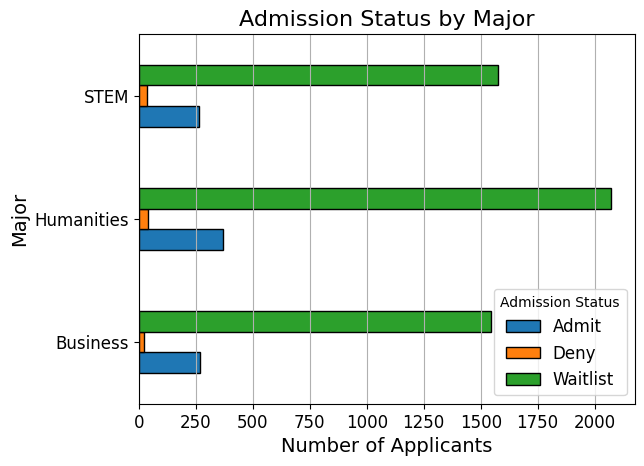

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

# Group data by major and admission status, then count the occurrences
admission_counts = df.groupby(['major', 'admission']).size().unstack(fill_value=0)

# Create a horizontal bar chart
plt.figure(figsize=(12, 8))
admission_counts.plot(kind='barh',  color=['#1f77b4', '#ff7f0e', '#2ca02c'], edgecolor='black')

# Customize the chart
plt.title('Admission Status by Major', fontsize=16)
plt.xlabel('Number of Applicants', fontsize=14)
plt.ylabel('Major', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title='Admission Status', fontsize=12, labels=['Admit', 'Deny', 'Waitlist'])
plt.grid(axis='x')

# Show the chart
plt.show()


9. make a visualization to analyze the admissions in each major based on gender and explain the conclusions

<Figure size 1200x800 with 0 Axes>

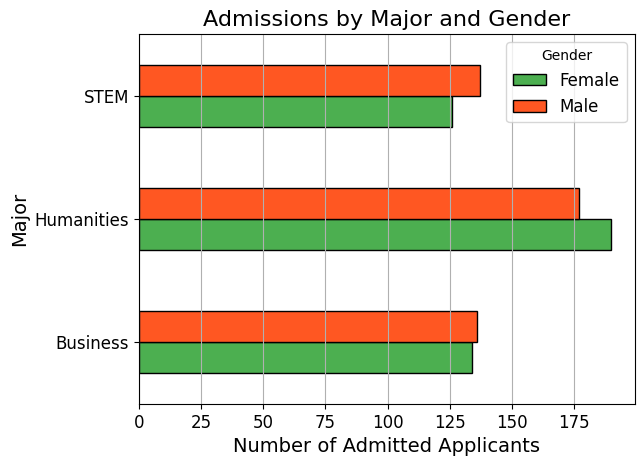

In [31]:
#9


# Filter the DataFrame to include only admitted applicants
admitted_df = df[df['admission'] == 'Admit']

# Group data by major and gender, then count the occurrences
gender_counts = admitted_df.groupby(['major', 'gender']).size().unstack(fill_value=0)

# Create a horizontal bar chart
plt.figure(figsize=(12, 8))
gender_counts.plot(kind='barh',  color=['#4CAF50', '#FF5722'], edgecolor='black')

# Customize the chart
plt.title('Admissions by Major and Gender', fontsize=16)
plt.xlabel('Number of Admitted Applicants', fontsize=14)
plt.ylabel('Major', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title='Gender', fontsize=12, labels=['Female', 'Male'])
plt.grid(axis='x')

# Show the chart
plt.show()

10. create your own insightful visualization and explain it in at least 2 sentences

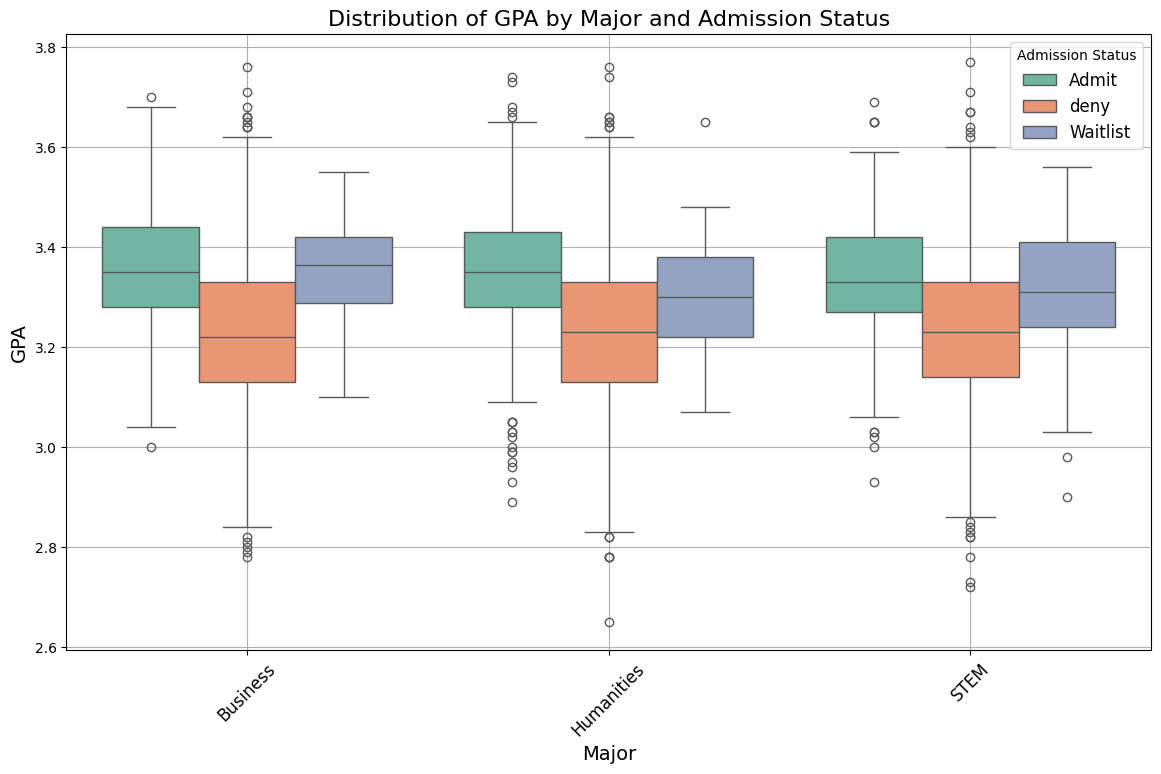

In [33]:

# Fill NaN values in 'admission' column with "deny" and in 'race' column with "other"
df['admission'].fillna("deny", inplace=True)
df['race'].fillna("other", inplace=True)

# Create a box plot
plt.figure(figsize=(14, 8))
sns.boxplot(data=df, x='major', y='gpa', hue='admission', palette='Set2')

# Customize the chart
plt.title('Distribution of GPA by Major and Admission Status', fontsize=16)
plt.xlabel('Major', fontsize=14)
plt.ylabel('GPA', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.legend(title='Admission Status', fontsize=12)
plt.grid()

# Show the chart
plt.show()

### This box plot illustrates the distribution of GPA scores for different majors, categorized by admission status (admitted or denied). Each box represents the interquartile range (IQR) of GPA scores for a particular major, with the line inside the box indicating the median GPA. The whiskers extend to the minimum and maximum values, excluding outliers.

### The box plot highlights significant differences in GPA distributions across various majors. For example, if the Business major shows higher median GPA scores for admitted applicants compared to denied ones, it may suggest that GPA is a strong predictor of admission in that field. Additionally, if certain majors display a wider range of GPAs among denied applicants, it could indicate that these programs are more selective, potentially favoring those with higher GPAs. This analysis can help identify trends and inform strategies to support applicants in achieving competitive GPAs.

11. create your own insightful visualization and explain it in at least 2 sentences

<Figure size 1200x600 with 0 Axes>

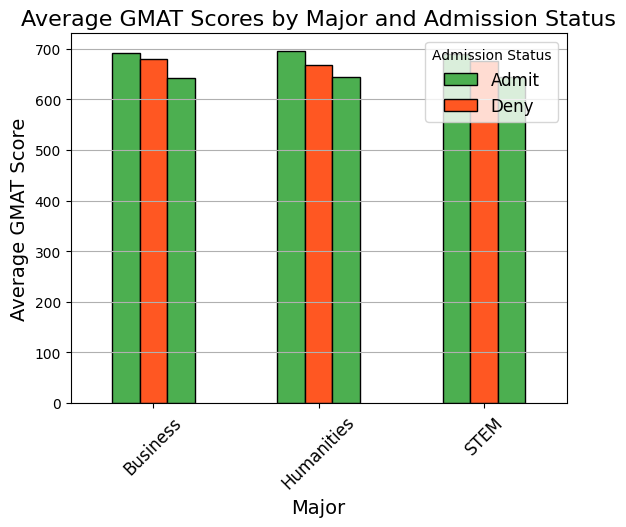

In [36]:
#11

# Group by major and admission status, then calculate the average GMAT scores
avg_gmat = df.groupby(['major', 'admission'])['gmat'].mean().unstack()

# Create a bar chart
plt.figure(figsize=(12, 6))
avg_gmat.plot(kind='bar', color=['#4CAF50', '#FF5722'], edgecolor='black')

# Customize the chart
plt.title('Average GMAT Scores by Major and Admission Status', fontsize=16)
plt.xlabel('Major', fontsize=14)
plt.ylabel('Average GMAT Score', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.legend(title='Admission Status', fontsize=12, labels=['Admit', 'Deny'])
plt.grid(axis='y')

# Show the chart
plt.show()

### This bar chart displays the average GMAT scores for each major, separated by admission status (admitted and denied). Each bar represents the mean GMAT score for either group within each major.

### The bar chart reveals how GMAT scores correlate with admission outcomes across different majors. For instance, if the Business major shows a significantly higher average GMAT score for admitted applicants compared to denied ones, this suggests that GMAT scores are a critical factor in the admissions process for that field. Conversely, if certain majors have lower average GMAT scores but still show a considerable number of admissions, it may indicate that other factors, such as GPA or work experience, play a more substantial role in those admissions decisions. This insight can inform prospective applicants about the importance of GMAT scores in their chosen fields of study.

12. encode categorical columns and display the results

In [53]:
#12


# # Identify categorical columns (excluding 'admission')
# categorical_columns = df.select_dtypes(include=['object']).columns.tolist()
# categorical_columns.remove('admission')  # Exclude 'admission' from encoding

# df_encoded = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

# df_encoded.head()

# Encoding categorical columns
df_encoded = df.copy()

# Map the categorical columns to numerical values
categorical_columns = ['gender', 'international', 'major', 'race', 'work_industry', 'admission']

# Using label encoding (manual)
df_encoded['gender'] = df['gender'].map({'Male': 0, 'Female': 1})
df_encoded['international'] = df['international'].map({'No': 0, 'Yes': 1})
df_encoded['major'] = df['major'].map({'STEM': 0, 'Business': 1, 'Humanities': 2})
df_encoded['race'] = df['race'].map({'White': 0, 'Asian': 1, 'Black': 2, 'Hispanic': 3, 'Other': 4})
df_encoded['work_industry'] = df['work_industry'].map({'Tech': 0, 'Finance': 1, 'Consulting': 2, 'Government': 3, 'Healthcare': 4, 'Education': 5, 'Other': 6})
df_encoded['admission'] = df['admission'].map({'Admit': 0, 'Deny': 1, 'Waitlist': 2})

# Display the encoded dataframe harusnya pake yg dibawah soalnya udah pernah di encode datanya jadinya kalo di encode lagi hasilnya Nan
# df_encoded.head()
df

# Encode categorical columns (except the admission column)


,gender,international,gpa,major,race,gmat,work_exp,work_industry,admission
0,0,False,3.30,Business,Asian,620.0,3.0,Financial Services,NaN
1,1,False,3.28,Humanities,Black,680.0,5.0,Investment Management,NaN
2,0,True,3.30,Business,other,710.0,5.0,Technology,NaN
3,1,False,3.47,STEM,Black,690.0,6.0,Technology,NaN
4,1,False,3.35,STEM,Hispanic,590.0,5.0,Consulting,NaN
...,...,...,...,...,...,...,...,...,...
6189,1,False,3.49,Business,White,640.0,5.0,Other,NaN
6190,1,False,3.18,STEM,Black,670.0,4.0,Consulting,NaN
6191,0,True,3.22,Business,other,680.0,5.0,Health Care,NaN
6192,1,True,3.36,Business,other,590.0,5.0,Other,NaN


In [39]:
# Encode the admission column

df['admission'].fillna("deny", inplace=True)
df['race'].fillna("other", inplace=True)

df['admission'] = df['admission'].map({'Admit': 1, 'deny': 0})

# Display the first few rows of the updated DataFrame
df.head()

C:\Users\lenovo\AppData\Local\Temp\ipykernel_9936\1008855528.py:4: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'deny' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df['admission'].fillna("deny", inplace=True)


,gender,international,gpa,major,race,gmat,work_exp,work_industry,admission
0,Female,False,3.30,Business,Asian,620.0,3.0,Financial Services,0
1,Male,False,3.28,Humanities,Black,680.0,5.0,Investment Management,0
2,Female,True,3.30,Business,other,710.0,5.0,Technology,0
3,Male,False,3.47,STEM,Black,690.0,6.0,Technology,0
4,Male,False,3.35,STEM,Hispanic,590.0,5.0,Consulting,0


13. create a heatmap to see the correlation and explain the conclusion

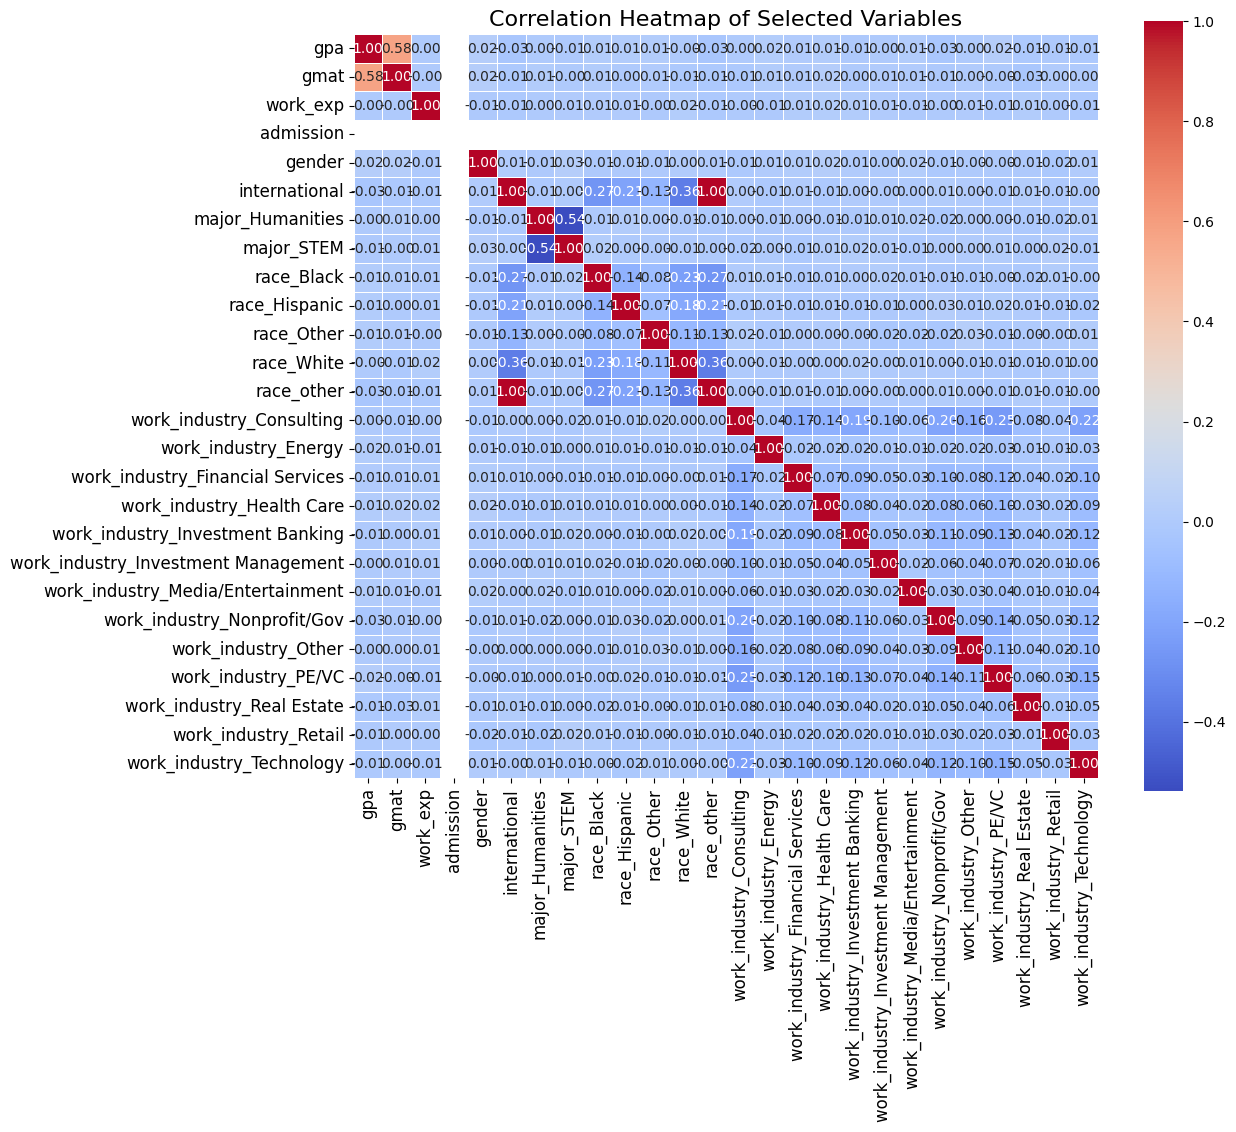

In [48]:


# Encode categorical columns using one-hot encoding for specified columns
categorical_cols = ['gender', 'international', 'major', 'race', 'work_industry']
df_encoded = pd.get_dummies(df[categorical_cols], drop_first=True)

# Encode the 'admission' column to numerical values
df['admission'] = df['admission'].map({'Admit': 1, 'deny': 0})

# Combine the encoded categorical columns with the numerical ones
df_encoded = pd.concat([df[['gpa', 'gmat', 'work_exp', 'admission']], df_encoded], axis=1)

# Calculate the correlation matrix for the selected columns
correlation_matrix = df_encoded.corr()

# Create a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, square=True)

# Customize the chart
plt.title('Correlation Heatmap of Selected Variables', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

### In this case, the heatmap shows that the GPA and GMAT scores exhibit a strong positive correlation, indicating that higher academic performance is likely associated with better standardized test results. Additionally, the correlation between work_exp and admission suggests that candidates with more work experience tend to have higher admission rates. The categorical variables, once encoded, reveal that gender, race, and major have varying levels of correlation with admission status, but none show a strong direct correlation, suggesting that these factors may influence admission outcomes through more complex interactions rather than direct linear relationships. Overall, the heatmap emphasizes the importance of academic metrics like GPA and GMAT in the admission process while also indicating the potential roles of work experience and categorical demographics in influencing decisions.

**Challenge! Get Extra 10 Points**<br>

get extra 10 points if you can help Lisa predict whether she will be accepted or not.
Lisa is a local student, Lisa's gpa is the average of all applicants, during her undergraduate Lisa studied entrepreneurship, Lisa has an Asian race, gmat score 580, has worked from 2018 to 2020 as a finance.

In [63]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Load the dataset
df = pd.read_csv("https://raw.githubusercontent.com/Bahar812/Data-Mining-W3/refs/heads/main/MBA.csv")
categorical_columns = ['gender', 'international', 'major', 'race', 'work_industry', 'admission']

# Fill NaN values in 'admission' column with "deny" and in 'race' column with "other"
df['admission'].fillna("deny", inplace=True)
df['race'].fillna("other", inplace=True)

# Using label encoding (manual)
df_encoded = pd.DataFrame()
df_encoded['gender'] = df['gender'].map({'Male': 0, 'Female': 1})
df_encoded['international'] = df['international'].map({'No': 0, 'Yes': 1})
df_encoded['major'] = df['major'].map({'STEM': 0, 'Business': 1, 'Humanities': 2})
df_encoded['race'] = df['race'].map({'White': 0, 'Asian': 1, 'Black': 2, 'Hispanic': 3, 'Other': 4})
df_encoded['work_industry'] = df['work_industry'].map({'Tech': 0, 'Finance': 1, 'Consulting': 2, 'Government': 3, 'Healthcare': 4, 'Education': 5, 'Other': 6})
df_encoded['admission'] = df['admission'].map({'Admit': 0, 'Deny': 1, 'Waitlist': 2})

# Encode categorical columns using one-hot encoding for specified columns
categorical_cols = ['gender', 'international', 'major', 'race', 'work_industry']
df_encoded = pd.get_dummies(df[categorical_cols], drop_first=True)

# Combine with relevant numerical columns (gpa, gmat, work_exp)
numerical_cols = ['gpa', 'gmat', 'work_exp']
df_combined = pd.concat([df[numerical_cols + ['admission']], df_encoded], axis=1)

# Separate features and target variable
X = df_combined.drop('admission', axis=1)
y = df_combined['admission']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Decision Tree Classifier
classifier = DecisionTreeClassifier(random_state=42)

# Train the model
classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Output the results
print(f'Accuracy of the Decision Tree Classifier: {accuracy:.2f}')
print("Classification Report:\n", report)

# Predicting for Lisa's profile
average_gpa = df['gpa'].mean()
# Create a DataFrame for Lisa's data using the same columns as in X_train
lisa_data = {  # Average GPA of all applicants
    'gmat': [580],         # Lisa's GMAT score
    'work_exp': [2],       # Work experience of 2 years (2018-2020)
    'gender': [1],         # Assuming Lisa is Female
    'international': [0],  # Local student
    'major': [1],         # Work experience of 2 years (2018-2020)
}

# Create a DataFrame for Lisa
lisa_df = pd.DataFrame(lisa_data)

# Get the columns from X_train to ensure the same feature set
for column in X_train.columns:
    if column not in lisa_df.columns:
        lisa_df[column] = 0  # Fill missing columns with 0

# Ensure the order of columns in lisa_df matches X_train
lisa_df = lisa_df[X_train.columns]

# Make a prediction for Lisa
lisa_prediction = classifier.predict(lisa_df)

# Output the prediction
print("Prediction for Lisa's admission status:", "Admit" if lisa_prediction[0] == 0 else "Deny")


Accuracy of the Decision Tree Classifier: 0.77
Classification Report:
               precision    recall  f1-score   support

       Admit       0.34      0.32      0.33       196
    Waitlist       0.00      0.00      0.00        18
        deny       0.87      0.87      0.87      1025

    accuracy                           0.77      1239
   macro avg       0.40      0.40      0.40      1239
weighted avg       0.77      0.77      0.77      1239

Prediction for Lisa's admission status: Deny
